In [84]:
import pandas as pd
import numpy as np
import math

In [141]:
def polynomial_dataframe(feature, degree):
    df = pd.DataFrame()
    
    df['power_1'] = feature
    
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            df[name] = feature.map(lambda x : math.pow(x, power))
            
    return df

In [81]:
sales = pd.read_csv('kc_house_data.csv')

sales.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [102]:
sales = sales.sort_values(by = 'sqft_living')
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000,0,0.00,290,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000,1,0.75,370,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000,1,0.75,380,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000,0,0.75,384,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000,0,1.00,390,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


In [17]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

poly

In [18]:
poly1_data.head()

,power_1,price
19452,290,142000
15381,370,276000
860,380,245000
18379,384,265000
4868,390,228000


In [19]:
from sklearn.linear_model import LinearRegression


In [23]:
model1 = LinearRegression()
model1.fit(poly1_data['power_1'].values.reshape(-1, 1), poly1_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
print model1.coef_
print model1.intercept_

[ 280.6235679]
-43580.7430945


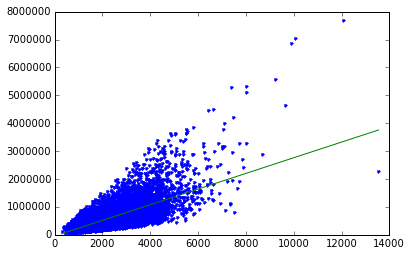

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'], poly1_data['price'], '.', 
         poly1_data['power_1'], model1.predict(poly1_data['power_1'].values.reshape(-1,1)), '-')



In [135]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price']

In [136]:
poly2_data.head()

,power_1,power_2,price
19452,290,84100,142000
15381,370,136900,276000
860,380,144400,245000
18379,384,147456,265000
4868,390,152100,228000


In [130]:
model2 = LinearRegression()
model2.fit(poly2_data[['power_1', 'power_2']], poly1_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print model2.coef_
print model2.intercept_


[  6.79940947e+01   3.85812609e-02]
199222.279305


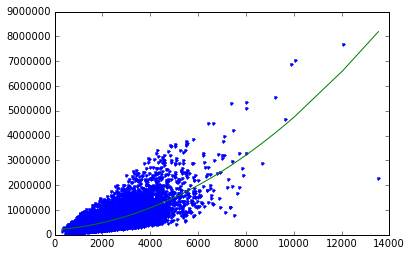

In [101]:
plt.plot(poly2_data['power_1'], poly2_data['price'], '.', 
         poly2_data['power_1'], model2.predict(poly2_data[['power_1', 'power_2']]), '-')

       power_1  power_2   power_3   price
19452      290    84100  24389000  142000
15381      370   136900  50653000  276000
860        380   144400  54872000  245000
18379      384   147456  56623104  265000
4868       390   152100  59319000  228000


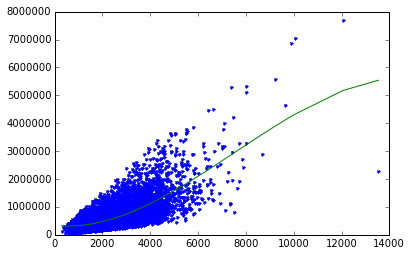

In [142]:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price']

model3 = LinearRegression()
model3.fit(poly3_data[['power_1', 'power_2', 'power_3']], poly3_data['price'])

#print model3.coef_
#print model3.intercept_
print poly3_data.head()

plt.plot(poly3_data['power_1'], poly3_data['price'], '.', 
         poly3_data['power_1'], model3.predict(poly3_data[['power_1', 'power_2', 'power_3']]), '-')

       power_1  power_2   power_3      power_4       power_5       power_6  \
19452      290    84100  24389000   7072810000  2.051115e+12  5.948233e+14   
15381      370   136900  50653000  18741610000  6.934396e+12  2.565726e+15   
860        380   144400  54872000  20851360000  7.923517e+12  3.010936e+15   
18379      384   147456  56623104  21743271936  8.349416e+12  3.206176e+15   
4868       390   152100  59319000  23134410000  9.022420e+12  3.518744e+15   

            power_7       power_8       power_9      power_10      power_11  \
19452  1.724988e+17  5.002464e+19  1.450715e+22  4.207072e+24  1.220051e+27   
15381  9.493188e+17  3.512479e+20  1.299617e+23  4.808584e+25  1.779176e+28   
860    1.144156e+18  4.347792e+20  1.652161e+23  6.278212e+25  2.385721e+28   
18379  1.231172e+18  4.727699e+20  1.815436e+23  6.971275e+25  2.676970e+28   
4868   1.372310e+18  5.352009e+20  2.087284e+23  8.140406e+25  3.174758e+28   

           power_12      power_13      power_14      pow

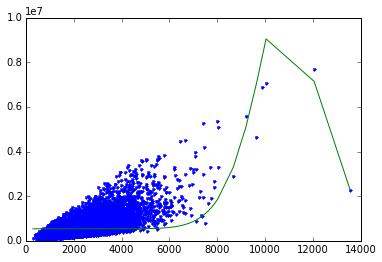

In [143]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']
print poly15_data.head()

model15 = LinearRegression()
model15.fit(poly15_data[['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']], poly15_data['price'])

print model15.coef_
print model15.intercept_
print poly15_data.head()

plt.plot(poly15_data['power_1'], poly15_data['price'], '.', 
         poly15_data['power_1'], model15.predict(poly15_data[['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']]), '-')

[  1.64434217e-78   5.49570854e-41  -1.49358851e-46   3.84872909e-51
  -2.87485915e-55   1.02994536e-58   1.76133638e-56   6.92533541e-53
   2.52158393e-49   8.13180979e-46   2.12182903e-42   3.49674784e-39
  -1.51135152e-42   2.15708834e-46  -1.01863598e-50]
536736.125543


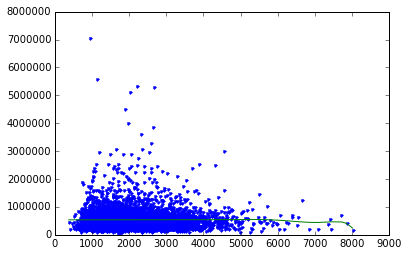

In [144]:
sales_part1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
sales_part1 = sales_part1.sort_values(by = 'sqft_living')

part1_data = polynomial_dataframe(sales_part1['sqft_living'], 15)
part1_data['price'] = sales['price']

p1_model15 = LinearRegression()
p1_model15.fit(part1_data[['power_1', 'power_2', 'power_3', 'power_4', 
                           'power_5', 'power_6', 'power_7', 'power_8', 
                           'power_9', 'power_10', 'power_11', 'power_12', 
                           'power_13', 'power_14', 'power_15']], part1_data['price'])

print p1_model15.coef_
print p1_model15.intercept_

plt.plot(part1_data['power_1'], part1_data['price'], '.', 
         part1_data['power_1'], p1_model15.predict(part1_data[['power_1', 'power_2', 'power_3', 'power_4', 
                                                            'power_5', 'power_6', 'power_7', 'power_8', 
                                                            'power_9', 'power_10', 'power_11', 'power_12', 
                                                            'power_13', 'power_14', 'power_15']]), '-')

[  2.51447026e-90   1.83872378e-50   1.54628566e-56   8.78755213e-61
   2.38584671e-74   5.48234076e-71   3.71944423e-67   2.46328648e-63
   1.57208262e-59   9.47017054e-56   5.18995859e-52   2.39496293e-48
   7.44238173e-45  -1.44183048e-48   6.84227760e-53]
536737.260984


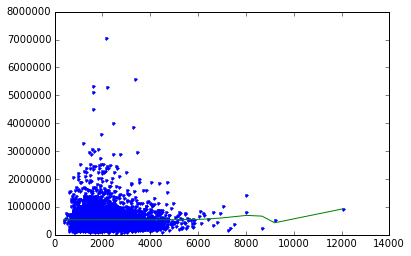

In [145]:
sales_part2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
sales_part2 = sales_part2.sort_values(by = 'sqft_living')

part2_data = polynomial_dataframe(sales_part2['sqft_living'], 15)
part2_data['price'] = sales['price']

p2_model15 = LinearRegression()
p2_model15.fit(part2_data[['power_1', 'power_2', 'power_3', 'power_4', 
                           'power_5', 'power_6', 'power_7', 'power_8', 
                           'power_9', 'power_10', 'power_11', 'power_12', 
                           'power_13', 'power_14', 'power_15']], part2_data['price'])

print p2_model15.coef_
print p2_model15.intercept_

plt.plot(part2_data['power_1'], part2_data['price'], '.', 
         part2_data['power_1'], p2_model15.predict(part2_data[['power_1', 'power_2', 'power_3', 'power_4', 
                                                            'power_5', 'power_6', 'power_7', 'power_8', 
                                                            'power_9', 'power_10', 'power_11', 'power_12', 
                                                            'power_13', 'power_14', 'power_15']]), '-')

[ -3.95653712e-80   2.03584390e-41   5.46455396e-47   2.81010214e-52
  -1.15210418e-55   2.55509039e-59  -1.12340621e-57  -5.29104992e-54
  -2.31228844e-50  -8.96510453e-47  -2.81665386e-43  -5.59697897e-40
   2.18188665e-43  -2.72362411e-47   1.10187042e-51]
536514.535948


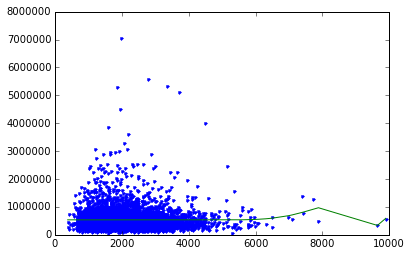

In [146]:
sales_part3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
sales_part3 = sales_part3.sort_values(by = 'sqft_living')

part3_data = polynomial_dataframe(sales_part3['sqft_living'], 15)
part3_data['price'] = sales['price']

p3_model15 = LinearRegression()
p3_model15.fit(part3_data[['power_1', 'power_2', 'power_3', 'power_4', 
                           'power_5', 'power_6', 'power_7', 'power_8', 
                           'power_9', 'power_10', 'power_11', 'power_12', 
                           'power_13', 'power_14', 'power_15']], part3_data['price'])

print p3_model15.coef_
print p3_model15.intercept_

plt.plot(part3_data['power_1'], part3_data['price'], '.', 
         part3_data['power_1'], p3_model15.predict(part3_data[['power_1', 'power_2', 'power_3', 'power_4', 
                                                            'power_5', 'power_6', 'power_7', 'power_8', 
                                                            'power_9', 'power_10', 'power_11', 'power_12', 
                                                            'power_13', 'power_14', 'power_15']]), '-')

[ -6.20390434e-91  -3.63336209e-50   1.53369352e-56   4.31795045e-62
  -2.26792375e-75  -1.18534766e-71  -7.89503189e-68  -5.16358997e-64
  -3.27635882e-60  -1.97672129e-56  -1.09349685e-52  -5.13507858e-49
  -1.63739098e-45   2.91973551e-49  -1.26326503e-53]
537019.503993


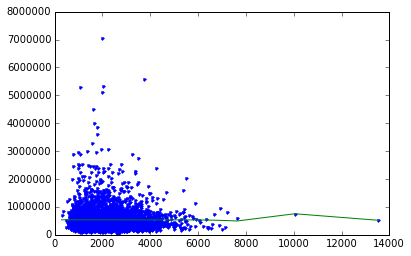

In [147]:
sales_part4 = pd.read_csv('wk3_kc_house_set_4_data.csv')
sales_part4 = sales_part4.sort_values(by = 'sqft_living')

part4_data = polynomial_dataframe(sales_part4['sqft_living'], 15)
part4_data['price'] = sales['price']

p4_model15 = LinearRegression()
p4_model15.fit(part4_data[['power_1', 'power_2', 'power_3', 'power_4', 
                           'power_5', 'power_6', 'power_7', 'power_8', 
                           'power_9', 'power_10', 'power_11', 'power_12', 
                           'power_13', 'power_14', 'power_15']], part4_data['price'])

print p4_model15.coef_
print p4_model15.intercept_

plt.plot(part4_data['power_1'], part4_data['price'], '.', 
         part4_data['power_1'], p4_model15.predict(part4_data[['power_1', 'power_2', 'power_3', 'power_4', 
                                                            'power_5', 'power_6', 'power_7', 'power_8', 
                                                            'power_9', 'power_10', 'power_11', 'power_12', 
                                                            'power_13', 'power_14', 'power_15']]), '-')

In [148]:
sales_train = pd.read_csv('wk3_kc_house_train_data.csv')
sales_test = pd.read_csv('wk3_kc_house_test_data.csv')
sales_valid = pd.read_csv('wk3_kc_house_valid_data.csv')

In [149]:
poly_data = {}
valid_data = {}
model = {}
rss_list = []

for i in range(1, 16):
    valid_data[i] = polynomial_dataframe(sales_valid['sqft_living'], i)
    valid_data[i]['price'] = sales_valid['price']
    
    poly_data[i] = polynomial_dataframe(sales_train['sqft_living'], i)
    poly_data[i]['price'] = sales_train['price']
    
    model[i] = LinearRegression()
    cols = list(poly_data[i].columns.values)
    cols = cols[:-1]

    if i == 1:
        X = poly_data[i][cols].values.reshape((-1, 1))
        valid_X = valid_data[i][cols].values.reshape((-1, 1))
    else:
        X = poly_data[i][cols]
        valid_X = valid_data[i][cols]
        
    model[i].fit(X, sales_train['price'])
    
    print model[i].coef_
    
    rss  = (model[i].predict(valid_X) - sales_valid['price']) ** 2
    rss = np.sum(rss)
    rss_list.append(rss)
    
print rss_list
print np.argmin(rss_list), np.min(rss_list)

[ 288.59846375]
[ 1.22673842  0.0522949 ]
[  7.50292074e+00   5.03063603e-02   1.67090667e-07]
[ -1.53852721e+01   6.08970906e-02  -1.61496571e-06   9.11725261e-11]
[  3.19604020e-05   5.44376194e-02  -6.35220167e-07   4.74146643e-11
  -2.01032028e-16]
[  8.50063281e-12   1.43263228e-08   3.79412700e-05  -9.89794221e-09
   1.06074704e-12  -3.90874334e-17]
[  8.80209177e-19  -1.70115582e-11   8.65371049e-12   1.40282350e-08
  -4.30479447e-12   4.64795699e-16  -1.67447601e-20]
[  5.37676814e-26  -5.00854585e-15   9.15100691e-19   2.17475857e-15
   3.74718437e-12  -1.17819508e-15   1.24986835e-19  -4.38361131e-24]
[  2.35440809e-33   5.55324738e-18  -4.85123872e-23   1.61351027e-22
   4.53006377e-19   8.23523085e-16  -2.58575972e-19   2.69914449e-23
  -9.28484969e-28]
[  8.10194270e-41   1.71840929e-21  -7.27850639e-27   7.87234322e-30
   2.82989842e-26   8.32511110e-23   1.58082448e-19  -4.93871231e-23
   5.10007290e-27  -1.73354179e-31]
[  2.32096277e-48   2.39356588e-25   9.86650146e-3

In [150]:
test_data = polynomial_dataframe(sales_test['sqft_living'], 2)
test_data['price'] = sales_test['price']

print np.sum((test_data['price'] - model[2].predict(test_data[['power_1', 'power_2']])) ** 2)

1.35542039274e+14


In [151]:
test_data = polynomial_dataframe(sales_test['sqft_living'], 1)
test_data['price'] = sales_test['price']

print np.sum((test_data['price'] - model[1].predict(test_data['power_1'].values.reshape(-1, 1))) ** 2)

1.42347931359e+14


In [152]:
test_data = polynomial_dataframe(sales_test['sqft_living'], 3)
test_data['price'] = sales_test['price']

print np.sum((test_data['price'] - model[3].predict(test_data[['power_1', 'power_2', 'power_3']])) ** 2)

1.35585996079e+14


In [153]:
test_data = polynomial_dataframe(sales_test['sqft_living'], 6)
test_data['price'] = sales_test['price']

print np.sum((test_data['price'] - model[6].predict(test_data[['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6']])) ** 2)

1.35225114558e+14
